# Data Science Pragmatic programming in Python


Code snippets for quick consult (copy n paste)

In [4]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
!pwd

/media/leandroohf/sdb1/leandro/ds_pragmatic_programming


## Bash

### Random sample

In [ ]:
%%bash 
# take random sample of lines in file (log analysys was useful)

shuf data/FremontBridge.csv | head -n 3 


### Filter with grep

In [ ]:
%%bash 

# Use grep to filter out pattern
cat data/FremontBridge.csv | grep -v 2013 | head -n 5

echo
# keep only 2013 and ignore case sensitive
cat data/FremontBridge.csv | grep -i 2013 | head -n 5

# Using regular expression (start with 12)
echo
cat data/FremontBridge.csv | grep -E "^12" | head -n 5

### run process in parralell

Use pararlels to speedup bash


In [8]:
# Creating scripts

bash_str = """\
ffmpeg -y -i data/audio0_hH79HnEdo.wav data/audio0_hH79HnEdo.flac
ffmpeg -y -i data/audio0KCVgexi4yU.wav data/audio0KCVgexi4yU.flac
ffmpeg -y -i data/audio0Q1JLNfm8oU.wav data/audio0Q1JLNfm8oU.flac
ffmpeg -y -i data/audio0vm7UpkSOnk.wav data/audio0vm7UpkSOnk.flac
ffmpeg -y -i data/audio2M9GSksX_ho.wav data/audio2M9GSksX_ho.flac
"""

!echo "{bash_str}"   > convert.sh 
!chmod u+x convert.sh

!cat convert.sh

ffmpeg -y -i data/audio0_hH79HnEdo.wav data/audio0_hH79HnEdo.flac
ffmpeg -y -i data/audio0KCVgexi4yU.wav data/audio0KCVgexi4yU.flac
ffmpeg -y -i data/audio0Q1JLNfm8oU.wav data/audio0Q1JLNfm8oU.flac
ffmpeg -y -i data/audio0vm7UpkSOnk.wav data/audio0vm7UpkSOnk.flac
ffmpeg -y -i data/audio2M9GSksX_ho.wav data/audio2M9GSksX_ho.flac



In [13]:
# serial
!time ./convert.sh

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

size=     705kB time=00:00:10.00 bitrate= 577.6kbits/s speed= 396x    
video:0kB audio:697kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.161219%
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libs

In [14]:
# parallel will run every line as a separate command in parallel
!/usr/bin//parallel -a ./convert.sh

Academic tradition requires you to cite works you base your article on.
When using programs that use GNU Parallel to process data for publication
please cite:

  O. Tange (2011): GNU Parallel - The Command-Line Power Tool,
  ;login: The USENIX Magazine, February 2011:42-47.

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

To silence this citation notice: run 'parallel --citation'.

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconf

In [16]:
# piping version
!ls data/*.wav | parallel ffmpeg -i {} {.}.flac

Academic tradition requires you to cite works you base your article on.
When using programs that use GNU Parallel to process data for publication
please cite:

  O. Tange (2011): GNU Parallel - The Command-Line Power Tool,
  ;login: The USENIX Magazine, February 2011:42-47.

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

To silence this citation notice: run 'parallel --citation'.

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconf

## Notebooks tricks 


* *Install conda enviroment in jupyter notebook *

* *Install kernel enviroment in jupyter notebook *

* *Run notebook in remote jupyter server*

In [ ]:
%bash

# run in thew remote machine
jupyter notebook --no-browser --port 8889

# run local machine
ssh -N -f -L localhost:8888:localhost:8889 datalab@172.21.1.4

# Copy token from the remote machine shell
# access jupyter notebook
http://localhost:8888/?token=054a85cc962d8c7ee5ba99517bfc5303020c7e2736f4b268


This can help with interacting with shell
* share variables between python and bash cell

In [ ]:
python_var = 'test1'
var_test2 = 10.3

# Option 1
data =  './mydata'

!mkdir -p {data}

In [ ]:
%%bash -s "$python_var" "$var_test2" "position_3"

echo $1
echo $2
echo $3
echo $data ## will not work

* define enviroment variable shared between bash cells

In [ ]:
%env MY_VAR=env_test_var
%env  v1=$python_var

In [ ]:
%%bash 

echo $MY_VAR
echo $v1

* **Run R code in cell**

In [3]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

/home/leandroohf/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/home/leandroohf/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  unable to access index for repository http://cran.us.r-project.org/src/contrib:
  Line starting '<!DOCTYPE HTML PUBLI ...' is malformed!

  warnings.warn(x, RRuntimeWarning)


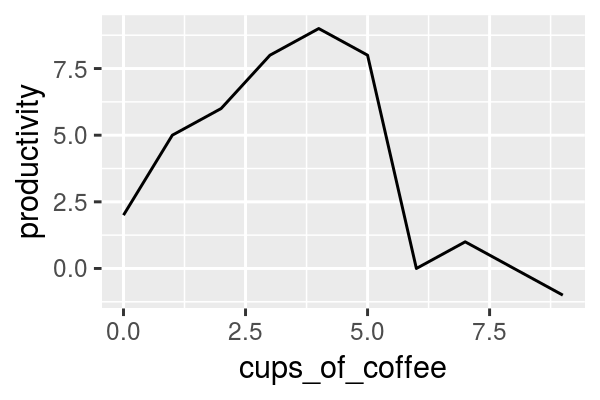

In [4]:
%%R -i df -w 3 -h 2 --units in -r 200
# import df from global environment
# make default figure size 3 by 3 inches with 200 dpi resolution

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

## Generate data 

* random numbers generation
* generate data
* load data sets (toy)

http://scikit-learn.org/stable/datasets/index.html

### Gen random numbers

* uniform
* normal
* multivariate
* bolean
* integer

In [ ]:
## random numbers
np.random.seed(seed=2018)

n = 3
a = np.random.rand(n,n)

# random boolean
b = np.random.uniform(size=3) > .5
b

# uniform
u = np.random.uniform(size=3)
u

# random int
i = np.random.randint(0,9,size=3)
i

# random choice
c = np.random.choice(['a','b','c','e'],size=7)
c

# normal
n = np.random.normal(size=5)
n

# multivariated normal 2d;
_mean = (1, 2)
_cov = [[1, 0], [0, 1]]
m = np.random.multivariate_normal(_mean, _cov, 3 )
m.shape
m

### Create dataframes

In [ ]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

pd.DataFrame.from_dict(data)


data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index')



# HOW to fixe: If using all scalar values, you must pass an index
# pd.DataFrame.from_dict({'col1': 1, 'col2': 3}) # <= RUN THIS LINE TO SEE THE ERROR
#pd.DataFrame({'A': 1, 'B': 2}) # # <= RUN THIS LINE TO SEE THE ERROR
pd.DataFrame({'A': 1, 'B': 2}, index=[0])

# OR
pd.DataFrame({'A': [1], 'B': [2]})

### Gen data for classifications and clustering

Shameless stolen from:
http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py


* **make_classification** create multiclass datasets by allocating each class one or more **normally-distributed** clusters of points

   make_classification introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space.

In [ ]:
## classification (normal distributed)
from sklearn.datasets import make_classification

plt.figure(figsize=(10, 15));

plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95);

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.subplot(321);
plt.title("One informative feature, one cluster per class", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)

plt.subplot(322);
plt.title("Two informative features, one cluster per class", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');


X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)

plt.subplot(323);
plt.title("Two informative features, two clusters per class",
          fontsize='small');

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')


X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)

plt.subplot(324);
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

plt.show();

* **make_blobs**: Generate isotropic (uniformity in all orientations) Gaussian blobs for clustering. 

* **make_gaussian_quantiles**: Generate isotropic Gaussian and label samples by quantile

In [ ]:
## Blobs n gaussian qunatiles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

X1, Y1 = make_blobs(n_features=2, centers=3, random_state=2018)

plt.figure(figsize=(11,5));

ax1 = plt.subplot(121);
plt.title("Three blobs", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3,n_samples=256,random_state=2018)

ax2 = plt.subplot(122);
plt.title("Gaussian divided into three quantiles", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

ax2.set_xlim(-4,4);
ax2.set_ylim(-4,4);

plt.show()

* **make_circles**: Make a large circle containing a smaller circle in 2d.

* **make_moons**: Make two interleaving half circles

In [ ]:
## Clustering
from sklearn.datasets import make_moons, make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=2018)

# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8));

ax1 = plt.subplot(121,aspect='equal');
ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax1.set_title("Circle Data (2d)");
ax1.set_xticks(());
ax1.set_yticks(());


X, y = make_moons(n_samples=400, noise=.05,random_state=2018)

ax2 = plt.subplot(122,aspect='equal');
ax2.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax2.set_title("Moons Data (2d)");
ax2.set_xticks(());
ax2.set_yticks(());

plt.tight_layout();
plt.show;


### Load data sets


* **load_iris** Load and return the iris dataset (classification).

<img src="images/iris_petal_sepal.png" width="250" align="left"/>


In [ ]:
## datasets

from sklearn.datasets import load_iris

# Load the Iris flower dataset:
iris = load_iris()
X_iris = iris.data
Y_iris = iris.target

print('data size: {}'.format(X_iris.shape))
print('features: {}'.format(iris.feature_names))
print('labels: {}'.format(iris.target_names))

print()

plt.figure(2, figsize=(4, 3));
plt.clf();

# Plot 
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=Y_iris, cmap=plt.cm.Set1,
            edgecolor='k');
plt.xlabel('Sepal length');
plt.ylabel('Sepal width');

* **load_boston**: Load and return the boston house-prices dataset (regression).

In [ ]:
# Boston house pricing

from sklearn.datasets import load_boston

boston = load_boston()

print('data size: {}'.format(boston.data.shape))
print('features: {}'.format(boston.feature_names))

# convert to data frame (but may times is not necessary)
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names

boston_df['target'] = boston.target

boston_df.head(4)

In [ ]:
data = pd.read_csv('data/phone_data.csv')

data.shape
data.head(5)

## Read and write data

* pandas
* dict
* file handle


### Pandas

* read from compressed csv
* read from sql db

In [3]:
# See the first rows
pd.read_csv('data/phone_data.csv', nrows=2).head()
pd.read_csv('data/phone_data.csv', sep=',',header=None, index_col=False).head()

## load
creditcard_df = pd.read_csv('data/creditcard_downsampled.csv.tar.bz2', compression='bz2', 
                            sep=',', quotechar='"', index_col=False)


creditcard_df.head(3)

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile


,0,1,2,3,4,5,6
0,index,date,duration,item,month,network,network_type
1,0,15/10/14 06:58,34.429,data,2014-11,data,data
2,1,15/10/14 06:58,13,call,2014-11,Vodafone,mobile
3,2,15/10/14 14:46,23,call,2014-11,Meteor,mobile
4,3,15/10/14 14:48,4,call,2014-11,Tesco,mobile


,data/creditcard_downsampled.csv,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,85380.0,-1.337885,0.261692,2.646536,-1.973014,-0.933318,-1.123839,0.277759,-0.039386,1.111226,...,0.332076,1.124621,-0.312253,0.968527,0.570910,-0.704900,0.253527,0.169347,72.64,0.0
1,116137.0,2.081591,-0.774080,-0.674991,-0.322871,-0.890005,-0.801469,-0.532596,-0.280944,-0.354142,...,-0.329597,-0.310603,0.268725,0.020092,-0.359343,0.555034,-0.025385,-0.044868,35.29,0.0
2,81976.0,-0.332971,1.188389,1.308248,0.052384,0.087272,-0.966515,0.750302,-0.108085,-0.488491,...,-0.258700,-0.638700,-0.029226,0.346024,-0.140051,0.070181,0.250678,0.099306,0.99,0.0


In [ ]:
# reads form database
import pandas as pd
import sqlite3

#conn = sqlite3.connect("data/flights.db")
with sqlite3.connect("data/flights.db") as conn:
    df = pd.read_sql_query("select * from airlines limit 11;", conn)
    
df.head(3)

In [14]:
df = pd.read_csv('data/phone_data.csv', index_col=False)

df.columns
df.drop('index',axis=1,inplace=True)

df.head(3)

Index(['index', 'date', 'duration', 'item', 'month', 'network',
       'network_type'],
      dtype='object')

,date,duration,item,month,network,network_type
0,15/10/14 06:58,34.429,data,2014-11,data,data
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile


In [16]:
df.to_csv('tmp.csv',index=False)

!head tmp.csv

date,duration,item,month,network,network_type
15/10/14 06:58,34.429,data,2014-11,data,data
15/10/14 06:58,13.0,call,2014-11,Vodafone,mobile
15/10/14 14:46,23.0,call,2014-11,Meteor,mobile
15/10/14 14:48,4.0,call,2014-11,Tesco,mobile
15/10/14 17:27,4.0,call,2014-11,Tesco,mobile
15/10/14 18:55,4.0,call,2014-11,Tesco,mobile
16/10/14 06:58,34.429,data,2014-11,data,data
16/10/14 15:01,602.0,call,2014-11,Three,mobile
16/10/14 15:12,1050.0,call,2014-11,Three,mobile


### Basic and dict IO

* **dump dict to json file**

In [1]:
import json

data = {}  
data['people'] = []  
data['people'].append({  
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})

with open('data.json', 'w') as outfile:  
    json.dump(data, outfile)
    
!cat data.json

with open('data.json', 'r') as f:
    datastore = json.load(f)
    
datastore

{"people": [{"name": "Scott", "website": "stackabuse.com", "from": "Nebraska"}]}

{'people': [{'name': 'Scott',
   'website': 'stackabuse.com',
   'from': 'Nebraska'}]}

In [ ]:
!rm -v data/output.tsv

* **Write txt file line by line**

In [ ]:
# lazzy way
for k in range(0,3):
    
    if k % 2 == 0:
        print('Processing: {}'.format(k))

    score =  np.random.normal(size=1)[0]
    print("{k:d}\t{score:.2f}".format(k=k, score=score), file=open("data/output.tsv", "a"))

# better way
with open('data/output.txt', 'a') as f:
    for k in range(0,3):
    
        if k % 2 == 0:
            print('Processing: {}'.format(k))

        score =  np.random.normal(size=1)[0]
        print("{k:d}\t{score:.2f}".format(k=k, score=score), file=f)


In [ ]:
!cat data/output.tsv

In [ ]:
import csv

my_dict = {'key1': 'value_a', 'key2': 1, 'key3': 2.0}

# write
with open('data/dict.csv', 'w') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in my_dict.items()];


# read
with open('data/dict.csv', 'r') as csv_file:
    
    reader = csv.reader(csv_file)
    my_dict2 = dict(reader)
    
my_dict2

In [ ]:
!cat data/dict.csv

In [ ]:
dict_list = [ {'key1': 1, 'key2': 'a'}, {'key1': 2, 'key2': 'b'}]

fieldnames = dict_list[0].keys()

# write
with open('data/people.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    dict_writer.writeheader()
    dict_writer.writerows(dict_list)
    
# read
with open('data/people.csv', mode='r') as infile:
    
    reader = csv.reader(infile)
    _ = next(reader, None)  # skip the headers
    mydict = [{'key1': rows[0], 'key2': rows[1]} for rows in reader]
    
mydict

In [ ]:
!cat data/people.csv

## Get data from internet 

In [ ]:
!curl -o data/FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [ ]:
bikes = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
bikes.head()

## Data wrangler (Remember, 80% of the project time is spent here)


### operating with list (very sueful)

http://book.pythontips.com/en/latest/map_filter.html

* map
* filter
* reduce


In [17]:
items = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, items))
squared

all_rows = [(1,1,'segid1', 3.0),(1,1,'segid2', 1.0),(2,2,'segid3', 4.0)]
list(filter(lambda t: t[1] == 1, all_rows))

from functools import reduce
product = reduce((lambda x, y: x * y), [1, 2, 3, 4])
product

[1, 4, 9, 16, 25]

[(1, 1, 'segid1', 3.0), (1, 1, 'segid2', 1.0)]

24

### Slicing or selection

pandas terminology are the indexers that do selections or subsetting: "[]", .loc and .iloc

refs:

[pandas cheat sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c  

https://github.com/tdpetrou/Learn-Pandas

<img src="images/data_frame.png" width="800" align="left"/>

In [18]:
data = {
'state': ['NY','TX','FL','AL','AK','TX','TX' ],
'color': ['blue','green','red','white','gray','black','red'],
'food': [ 'Steak', 'Lamb', 'Mango', 'Apple', 'Cheese', 'Melon', 'Beans' ],
'age': [ 30, 2, 12, 4, 32, 33, 69 ],
'height': [ 165, 70, 120, 80, 180, 172, 150 ],
'score': [ 4.6, 8.3, 9.0, 3.3, 1.8, 9.5, 2.2 ]
}

df = pd.DataFrame.from_dict(data, )
df.index = ['Jane', 'Niko', 'Aaron', 'Penelope', 'Dean', 'Christina', 'Cornelia' ]

values = df.values
df

df.columns
values

,state,color,food,age,height,score
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


Index(['state', 'color', 'food', 'age', 'height', 'score'], dtype='object')

array([['NY', 'blue', 'Steak', 30, 165, 4.6],
       ['TX', 'green', 'Lamb', 2, 70, 8.3],
       ['FL', 'red', 'Mango', 12, 120, 9.0],
       ['AL', 'white', 'Apple', 4, 80, 3.3],
       ['AK', 'gray', 'Cheese', 32, 180, 1.8],
       ['TX', 'black', 'Melon', 33, 172, 9.5],
       ['TX', 'red', 'Beans', 69, 150, 2.2]], dtype=object)

* *indexing operator: []**

In [ ]:
# returns a series
# A Series is a one-dimensional sequence of labeled data. 
df['food']
    
# Select multiple columns as a DataFrame by passing a list to it
# return dataframe
# the order of the column does not matter for selecting
df[['color', 'food', 'score']]

* **.loc** subset rows and columns

only selects data by the LABEL of the rows and columns.


In [ ]:
# Select rows  n returns serries
df.loc['Niko']

# select mutliple rows n return data frames
df.loc[['Niko', 'Penelope']]


# Slicing between range of rows
df.loc['Niko':'Dean']

# from begin to Aaron
df.loc[:'Aaron']

# from Dean to end
df.loc['Dean':]

# controling the step
df.loc['Niko':'Christina':2]


# selecting rows n columns
# df.loc[row_selection, column_selection]
df.loc[['Dean', 'Cornelia'], ['age', 'state', 'score']]


* **.iloc**

only uses integer locations to make its selections.

In [ ]:
df.iloc[[5, 2, 4]]  

df.iloc[3:5]

# Select 3rd position to end by 2:
df.iloc[3::2]

# Select two rows and two columns:
df.iloc[[2,3], [0, 4]]

# slices for both axes
df.iloc[2:5, 2:5]

df.iloc[:,2:5]

* Selecting hierarchical columns like the ones returned by grouby

**TODO**: How to select multiple rows? 

In [ ]:
# Example
df[('loading_time','median')]

### Delete colum or row,  reset index,  convert to a type, concat dataframes and sort




| Pandas dtype  | Python type | NumPy type                                                     | Usage        |
|-------------- | ----------- | -------------------------------------------------------------- | -------------|
| object        | str         | string_, unicode_                                              | Text         |
| int64         | int         | int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Int,numbers  |
| float64       | float       | float_, float16, float32, float64                              | Floa, numbers|
| bool          | bool        | bool_                                                          | True/False   |
| datetime64    | NA          | datetime64[ns]                                                 | Date n time  |
| timedelta[ns] | NA          | NA                                                             | Dif btw times|
| category      | NA          | NA                                                             | factors      |


In [ ]:
# drop columns
df = df.drop(columns=['B', 'C'])

#drop rows by index
df = df.drop([0, 1])

# reset index
df = df.reset_index()

# see the types
df.dtypes

# see more info <= BETTER THAN dtypes for inspection
df.info()

# convert to a type
df['Customer Number'] = df['Customer Number'].astype('int')


In [ ]:
pages_view = pd.concat(pages, ignore_index= True)

In [ ]:
df.sort_values(['a', 'b'], ascending=[True, False])

### Work with category (factors) data

https://pbpython.com/categorical-encoding.html

* How to convert to category
* Label encoding
* One hot encode
*


Only if I see values
See this article http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/
and the package is here http://contrib.scikit-learn.org/categorical-encoding/
    
    

### Missings

In [ ]:
bikes = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)

bikes.columns = ['West', 'East']

bikes.shape

bikes = bikes.dropna()
bikes.shape

bikes.head()

### duplicates

In [ ]:
data = {'col_1': [3, 2, 3, 0], 'col_2': ['a', 'b', 'a', 'd']}

df = pd.DataFrame.from_dict(data)
df.head()

# last or first <= default or False = drop all cases
# subset to ignore olther columns while considering duplicated
df = df.drop_duplicates(keep='last',subset=['col_1','col_2'])

df.head()

### Path manipulations

http://pbpython.com/pathlib-intro.html


<img src="images/pathlib_cheatsheet_p1.png" width="600" align="left"/>

In [ ]:
from pathlib import Path

in_file_1 = Path.cwd() / "in" / "input.xlsx"

p = Path.cwd()


print('logical checks: is a dir , is a file?')
p.is_dir()

p.is_file()


print('Get parts (split)')
p.parts


print('paths, parents ...')
p.absolute()

p.parent

p.as_uri()


### String manipulation 


* basic string manipulation
* vectorized string manipulation
  (take notes of the pros n crons)
    
    https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html
        

## Data summarizations and merge data

### Summarize data


* descriptive (tables)
* groupby
* count frequency 


In [5]:
data = pd.read_csv('./data/phone_data.csv')

data.shape

data.head(5)

(830, 7)

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


#### Count frequency

In [6]:
data.item.unique()
print()
data.item.value_counts()

array(['data', 'call', 'sms'], dtype=object)

call    388
sms     292
data    150
Name: item, dtype: int64

#### Groupby



Split-Apply-Combine

<img src="images/split-apply-combine.png" width="400" align="left"/>


In [7]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(['month', 'item'], as_index=False).aggregate({
                                 'duration': {'min': min, '1q': lambda x: np.percentile(x,25),'median': np.median,
                                                          '3q': lambda x: np.percentile(x,75), 'max': max,
                                                          'std': np.std, 'cv': lambda x: np.median(x)/np.std(x)},
                                 'date':  'first',       # get the first date per group
                                 'network_type': ['nunique', 'count']
                                    }).sort_values(by=[('duration','min')],ascending=False, na_position='last').head(7)


/home/leandroohf/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
/home/leandroohf/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars


month  item duration                                                 \
                       min      1q  median       3q       max         std   
1   2014-11  data   34.429  34.429  34.429   34.429    34.429    0.000000   
4   2014-12  data   34.429  34.429  34.429   34.429    34.429    0.000000   
7   2015-01  data   34.429  34.429  34.429   34.429    34.429    0.000000   
10  2015-02  data   34.429  34.429  34.429   34.429    34.429    0.000000   
13  2015-03  data   34.429  34.429  34.429   34.429    34.429    0.000000   
3   2014-12  call    2.000  10.500  55.000  152.000  2120.000  324.731798   
6   2015-01  call    2.000  15.500  55.500  273.500  1859.000  300.671661   

                            date network_type        
              cv           first      nunique count  
1   1.615150e+15  15/10/14 06:58            1    29  
4   1.615150e+15  13/11/14 06:58            1    30  
7   2.422725e+15  13/12/14 06:58            1    31  
10  2.422725e+15  13/01/15 06:58            1    31  
13  1.615150e+15  13/02/15 06:58            1    29  
3   1.704528e-01  14/11/14 17:24            3    79  
6   1.856445e-01  15/12/14 20:03            3    88

#### crosstab

In [ ]:
pd.crosstab(data.network_type, data.item, margins=True, margins_name="Total")

pd.crosstab(data.network_type, data.item, normalize=True)

**comparing with groub by and pivot table**

crosstabe is more easy to read and do not have the extr steps

In [ ]:
pd.crosstab(data.network_type, data.item)

data.groupby(['network_type', 'item'])['network_type'].count().unstack().fillna(0)

data.pivot_table(index='item', columns='network_type', aggfunc={'network_type':len}, fill_value=0)


#### pivot table

http://pbpython.com/pandas-pivot-table-explained.html



<img src="images/pivot-table-datasheet.png" width="500" align="left"/>

In [ ]:
table = pd.pivot_table(data,index=["item","network_type"],
               values=["duration"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

table

In [ ]:
table.query('network_type == ["data", "sms", "mobile"]')

### Joins


left , right n inner join

| Merge method | SQL Join Name    | Description                               |  
|--------------|----------------- |-------------------------------------------|  
| left         | LEFT OUTER JOIN  | Use keys from left frame only             |  
| right        | RIGHT OUTER JOIN | Use keys from right frame only            |  
| outer        | FULL OUTER JOIN  | Use union of keys from both frames        |  
| inner        | INNER JOIN       | Use intersection of keys from both frames |



In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'], 
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],  
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, how='left', on=['key1', 'key2'])

left

right

result

### Cartesian product or cross join

In [ ]:
df1 = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3']})


df2 = pd.DataFrame({'key1': ['Q0', 'Q1', 'Q2', 'Q3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


# Add dummy key
df1['_tmpkey'] = 1
df2['_tmpkey'] = 1

cartesian_df = pd.merge(df1[['_tmpkey',"A"]], df2[['_tmpkey',"B"]], on='_tmpkey').drop('_tmpkey', axis=1)
#cartesian_df.index = pd.MultiIndex.from_product((df1.index, df2.index))
cartesian_df = cartesian_df.reset_index(drop=True)

df1.drop('_tmpkey', axis=1, inplace=True)
df2.drop('_tmpkey', axis=1, inplace=True)


cartesian_df.head(11)

### High performance eval n query

https://jakevdp.github.io/PythonDataScienceHandbook/03.12-performance-eval-and-query.html

Motivations
for large df n arrays eval n query are faster


## Graph Data

TODO:

1. Create graphs from tables
2. Get connected components
3. Graph visualizations


## Geo located data


TODO:

1. Read images
2. combine raster n data images with vectorial images
3. do kring interpolation in a sparse data


## Neural network



In [21]:
df.columns

Index(['state', 'color', 'food', 'age', 'height', 'score2'], dtype='object')